# AI vs. Human
Assuming the same image segmenter and models, results are predetermined for labeling.
Thus, we can easily compare on an image-to-image basis the assigned Region and its ML-assigned label ("Labels") and compare against the human assigned labels ("Labels_RC" for Rachel, can change based on person)

In [2]:
# Imports
import sys
sys.path.append("..")
from Utility.segmentation_utils import *
import Utility.model_utils as mu
import matplotlib.pyplot as plt
import os

In [3]:
### DEFINE VARIABLES OF INTEREST HERE ###
# vvv Three key values to change vvv

## Define folder path of interest, image of interest, and csv path for folder of interest
# Note: Can maybe automate this, but name changing makes it difficult
img_folder = "../Images/Organized images 20230613/L-3_nM-3_au10_mixing-T_oven-T_embed-Ag"
image_name = "L-3_nM-3_au10_mixing-T_oven-T_embed-Ag_01.tif"
csv_path = "../Results/Organized images 20230613_Results/L-3_nM-3_au10_mixing-T_oven-T_embed-Ag_edge-darkbright_thresh-ensemble.csv"

# Runtime settings to compare against
edge = "darkbright"
thresh = "ensemble"

# Derive variables
img_path = os.path.join(img_folder,image_name)

# Check that the files exist. If an assert fails, check the naming!
assert(os.path.exists(img_folder))
assert(os.path.exists(img_path))
assert(os.path.exists(csv_path))

In [4]:
# Get the already processed csv
df = pd.read_csv(csv_path)
IS = ImageSegmenter(img_path,threshold_mode="ensemble",edge_modification="darkbright")


(3, 3)


In [5]:
## TESTING CELL

img_logical = df.Filename.str.contains(image_name)
df_img = df[img_logical]
df_region_list = df_img.Region.to_list()
region_list = IS.df.Region.to_list()


print(len(region_list))
print(len(df_region_list))

print(IS.df.head(5))
print(df_img.head(5))
for meh in list(zip(sorted(df_region_list),sorted(region_list))):
    print(meh)

comp_key = ['area','equivalent_diameter','major_axis_length','minor_axis_length']
comp_check_arr = []
df_new = IS.df.set_index("Region")
df_img = df_img.set_index("Region")
print(df_img.area)
print(df_new.area)
for reg_id in region_list:
    try:
        row_1 = df_new.loc[reg_id][comp_key].to_dict()
        row_2 = df_img.loc[reg_id][comp_key].to_dict()
    except:
        print("Column issue")
        continue
    res = True
    for key,_ in row_1.items():
        if np.round(row_1[key],2) != np.round(row_2[key],2):
            print(row_1[key],row_2[key])
            res = False
    comp_check_arr.append(res)

print(comp_check_arr)
print(np.unique(comp_check_arr))

    

    


141
139
          area  equivalent_diameter  orientation  major_axis_length  \
0  487009.4043           787.451352    -1.031933         967.493092   
1  567519.1616           850.051668    -1.514231        1399.538252   
2  118262.4243           388.041744    -0.582336         573.860700   
3  374717.1692           690.727673     1.443843        1099.466179   
4  261898.1527           577.459163    -0.236083         683.292963   

   minor_axis_length    perimeter  min_intensity  mean_intensity  \
0         689.582167  3707.543028           82.0      216.255273   
1         595.022088  4967.508539           94.0      208.196473   
2         289.503509  1876.559171          111.0      175.795843   
3         469.209990  3257.335824          107.0      186.206654   
4         529.572575  2530.357005          117.0      200.258465   

   max_intensity  solidity  ...  moments_hu-4  moments_hu-5  moments_hu-6  \
0          255.0  0.864153  ...  7.739816e-10  1.010392e-06 -1.108003e-09   
1 

/home/jacob/Desktop/Academics/Mirkin/colloidal_crystal_ML/Workbooks/../Utility/segmentation_utils.py:432: RuntimeWarning: divide by zero encountered in divide
  clusters['major_axis_length/minor_axis_length'] = clusters['major_axis_length']/clusters['minor_axis_length']
/home/jacob/Desktop/Academics/Mirkin/colloidal_crystal_ML/Workbooks/../Utility/segmentation_utils.py:434: RuntimeWarning: invalid value encountered in divide
  clusters['perimeter/minor_axis_length'] = clusters['perimeter']/clusters['minor_axis_length']


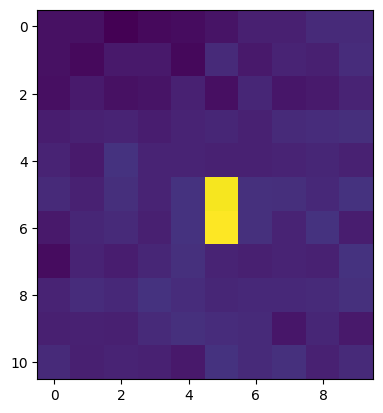

KeyError: 10

In [10]:
for key,img in IS.region_dict.items():
    clear_output(wait=False)
    plt.imshow(img)
    plt.show()
    print(f'Model Thinks: {df_img.loc.get[key].get("Labels","does not exist")}')
    input('hit enter')

In [ ]:
len(IS.region_arr)

141